In [1]:
import lgdo
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
#import pygama
import h5py
import pandas as pd
import time
import datetime
from datetime import datetime
import os
from tqdm import tqdm
from lgdo import show
from datetime import datetime
import re
from datetime import timedelta
from scipy.optimize import curve_fit, minimize
from pandas import DataFrame
import colorsys
import random
import Analysis_Functions
import Plotting_Functions
import pickle
import legend_data_monitor as ldm 
import matplotlib.colors as mcolors


In [2]:
run=["01"]#["00", "01", "02", "03", "04", "05", "06", "07", "08", "09"]
period = ["07"]#["03", "04", "05", "06", "07", "08"]
excluded_runs = []
excluded_period = []
chan_num=54
#funf
#6.50
#2EURO

In [3]:
# Short Analysis for Overview functions (Int. light, multiplicity, ...)
with open('PMT_ID.pkl', 'rb') as file:
    PMT_ID = pickle.load(file)

filepaths_MV, filenames_MV, pmt_phy_dir, first_period, last_period, first_run, last_run, filenames_HPGe_LAr, \
    filepaths_HPGe_LAr = Analysis_Functions.filepaths_names(period, run, excluded_period, excluded_runs)

date_list_small_for_loop, date_list, time_list = Analysis_Functions.run_dates(pmt_phy_dir, period, run, excluded_period, excluded_runs)

new_dir = Analysis_Functions.new_directories(period, run)

mean_spp_arr, calibration_means_dict, calibration_date_dict = Analysis_Functions.calib_data(period, run, new_dir, excluded_period, excluded_runs)

total_mult, mult_pillbox, mult_floor, mult_wall, integral_light, total_duration, muon_cond_total_rate, pulse_heights, trigd, \
   complete_duration, rates_arr, rates_red_arr, event_number, time_list, pulse_lows, pulse_heights_not_normed, timestamps_MV, \
   red_muon_mult, red_integral_light, non_phys, df_MV_all = Analysis_Functions.getting_data_from_files(
   chan_num, calibration_date_dict, filepaths_MV, calibration_means_dict, time_list, new_dir)

integral_light_peak_valley = Analysis_Functions.undershoot_analysis(pulse_lows, pulse_heights, chan_num, pulse_heights_not_normed)

#percent_df = Analysis_Functions.PMT_breaks(pulse_heights, trigd)

filtered_rows_non_phys, arr_timestamps, arr_column_names = Analysis_Functions.getting_HPGe_LAr_data_from_files(filepaths_HPGe_LAr, timestamps_MV, new_dir, df_MV_all)

['20230807', '20230808', '20230809', '20230810', '20230811', '20230812', '20230813', '20230814']


  0%|          | 0/8 [00:00<?, ?it/s]

(212,)
(212,)


(207,)
(207,)


(209,)
(209,)


(214,)
(214,)


(201,)
(201,)


151it [00:08, 18.18it/s]
 12%|█▎        | 1/8 [00:08<00:58,  8.31s/it]

(210,)
(210,)


(218,)
(218,)


(200,)
(200,)


(197,)
(197,)


(201,)
(201,)


(206,)
(206,)


(228,)
(228,)


(206,)
(206,)


(216,)
(216,)


(202,)
(202,)


(217,)
(217,)


(192,)
(192,)


(220,)
(220,)


(240,)
(240,)


(186,)
(186,)


(194,)
(194,)


(195,)
(195,)


(195,)
(195,)


(217,)
(217,)


(232,)
(232,)


(181,)
(181,)


151it [00:29,  5.07it/s]
 25%|██▌       | 2/8 [00:38<02:05, 20.94s/it]

(201,)
(201,)


/global/u1/g/ginagrue/Scripts/Analysis_Functions.py:542: RuntimeWarning: divide by zero encountered in divide
  muon_cond = ((muon_mul>=12)|(integral_pulse_heights_pe >=30)) & (integral_pulse_heights_pe/muon_mul>=0.45)
/global/u1/g/ginagrue/Scripts/Analysis_Functions.py:545: RuntimeWarning: divide by zero encountered in divide
  non_phy_condition = (integral_pulse_heights_pe/muon_mul < 0.45)


(10019,)
(10019,)


(189,)
(189,)


(195,)
(195,)


(210,)
(210,)


(217,)
(217,)


(216,)
(216,)


(188,)
(188,)


(222,)
(222,)


(206,)
(206,)


(240,)
(240,)


(211,)
(211,)


(191,)
(191,)


(209,)
(209,)


(192,)
(192,)


(193,)
(193,)


(233,)
(233,)


(190,)
(190,)


(199,)
(199,)


(195,)
(195,)


(231,)
(231,)


(210,)
(210,)


(268,)
(268,)


(199,)
(199,)


151it [00:36,  4.12it/s]
 38%|███▊      | 3/8 [01:14<02:20, 28.12s/it]

(233,)
(233,)


(248,)
(248,)
(197,)
(197,)
(222,)
(222,)


(207,)
(207,)
(200,)
(200,)


(214,)
(214,)


(184,)
(184,)


(211,)
(211,)


(207,)
(207,)


(208,)
(208,)


(191,)
(191,)


(230,)
(230,)


(182,)
(182,)


(221,)
(221,)


(212,)
(212,)


(213,)
(213,)


(209,)
(209,)


(170,)
(170,)


(169,)
(169,)


(212,)
(212,)


(184,)
(184,)


(219,)
(219,)


(200,)
(200,)


151it [00:28,  5.21it/s]
 50%|█████     | 4/8 [01:43<01:53, 28.45s/it]

(218,)
(218,)


(185,)
(185,)
(209,)
(209,)
(193,)
(193,)
(231,)
(231,)
(200,)
(200,)
(228,)
(228,)
(205,)
(205,)
(217,)
(217,)


(180,)
(180,)


(212,)
(212,)
(207,)
(207,)
(221,)
(221,)
(230,)
(230,)


(180,)
(180,)
(240,)
(240,)


(217,)
(217,)
(209,)
(209,)


(248,)
(248,)


(191,)
(191,)


(201,)
(201,)


(199,)
(199,)


(212,)
(212,)


(206,)
(206,)


151it [00:32,  4.61it/s]
 62%|██████▎   | 5/8 [02:16<01:30, 30.02s/it]

(208,)
(208,)


(184,)
(184,)
(190,)
(190,)
(209,)
(209,)
(185,)
(185,)
(218,)
(218,)
(203,)
(203,)
(206,)
(206,)
(209,)
(209,)
(176,)
(176,)
(208,)
(208,)


(92,)
(92,)


(211,)
(211,)
(225,)
(225,)
(194,)
(194,)
(193,)
(193,)


(224,)
(224,)
(207,)
(207,)
(205,)
(205,)


151it [00:23,  6.53it/s]
 75%|███████▌  | 6/8 [02:39<00:55, 27.67s/it]

(211,)
(211,)


(189,)
(189,)
(186,)
(186,)
(192,)
(192,)
(211,)
(211,)
(212,)
(212,)
(205,)
(205,)
(185,)
(185,)
(220,)
(220,)
(182,)
(182,)


(200,)
(200,)
(249,)
(249,)
(183,)
(183,)
(214,)
(214,)


(176,)
(176,)
(220,)
(220,)


(200,)
(200,)
(207,)
(207,)


(202,)
(202,)


(209,)
(209,)


(231,)
(231,)


(210,)
(210,)


(223,)
(223,)


(178,)
(178,)


151it [00:27,  5.46it/s]
 88%|████████▊ | 7/8 [03:07<00:27, 27.67s/it]

(192,)
(192,)


(210,)
(210,)
(200,)
(200,)
(214,)
(214,)
(214,)
(214,)
(207,)
(207,)
(217,)
(217,)
(209,)
(209,)
(192,)
(192,)


151it [00:12, 12.08it/s]
100%|██████████| 8/8 [03:19<00:00, 24.97s/it]

/global/cfs/projectdirs/legend/data/lngs/l200/public/prodenv/prod-blind/tmp/auto/generated/tier/dsp/phy/p07/r001/l200-p07-r001-phy-20230814T075153Z-tier_dsp.lh5 /global/cfs/projectdirs/legend/data/lngs/l200/public/prodenv/prod-blind/tmp/auto/generated/tier/dsp/phy/p07/r001/l200-p07-r001-phy-20230814T085158Z-tier_dsp.lh5
(71,)
(71,)
(71, 54)
(54, 40770)
(40770,)
(40770, 54)
(40770,)
0.05458416372167131



/global/u1/g/ginagrue/Scripts/Analysis_Functions.py:703: RuntimeWarning: divide by zero encountered in divide
  condition = ((total_mult >= 12) | (integral_light >= 30)) & (integral_light / total_mult >= 0.45)
/global/u1/g/ginagrue/Scripts/Analysis_Functions.py:806: RuntimeWarning: divide by zero encountered in divide
  idx2 = (wanted_pulse_heights_not_normed[:,chan_number]>1000) & (wanted_pulse_lows[:,chan_number]!=0) & (wanted_pulse_heights[:,chan_number]/np.abs(wanted_pulse_lows[:,chan_number])<1000)
/global/homes/g/ginagrue/.conda/envs/muon_veto/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/global/homes/g/ginagrue/.conda/envs/muon_veto/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/global/homes/g/ginagrue/.conda/envs/muon_veto/lib/python3.9/site-packages/numpy/core/_methods.p

Number of rows with timestamps closer than 0 days 00:00:00.000015500 seconds: 0


In [4]:
df_timestamps = pd.read_csv(new_dir + 'df_timestamps.csv',  sep='\t', index_col=None)
df_timestamps['all_timestamps'] = pd.to_datetime(df_timestamps['all_timestamps'])
df_timestamps['timestamps_HPGe_pulser'] = pd.to_datetime(df_timestamps['timestamps_HPGe_pulser'])
df_timestamps['timestamps_MV'] = pd.to_datetime(df_timestamps['timestamps_MV'])
arr_timestamps = df_timestamps.values
arr_column_names = df_timestamps.columns.tolist()
del df_timestamps

/tmp/ipykernel_800253/2393044070.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_timestamps = pd.read_csv(new_dir + 'df_timestamps.csv',  sep='\t', index_col=None)


In [5]:
binned_data_array, second_range_timestamps, pulser_events_MV_arr, column_names_pulser_events_MV_arr, wanted_arr_column_names, wanted_arr_timestamps = Analysis_Functions.muon_data_1_s_rate(arr_column_names, arr_timestamps, \
    wanted_min_amount_non_phys=20, non_phys='all')

100%|██████████| 11970240/11970240 [00:04<00:00, 2603158.59it/s]


100%|██████████| 54/54 [00:57<00:00,  1.06s/it]


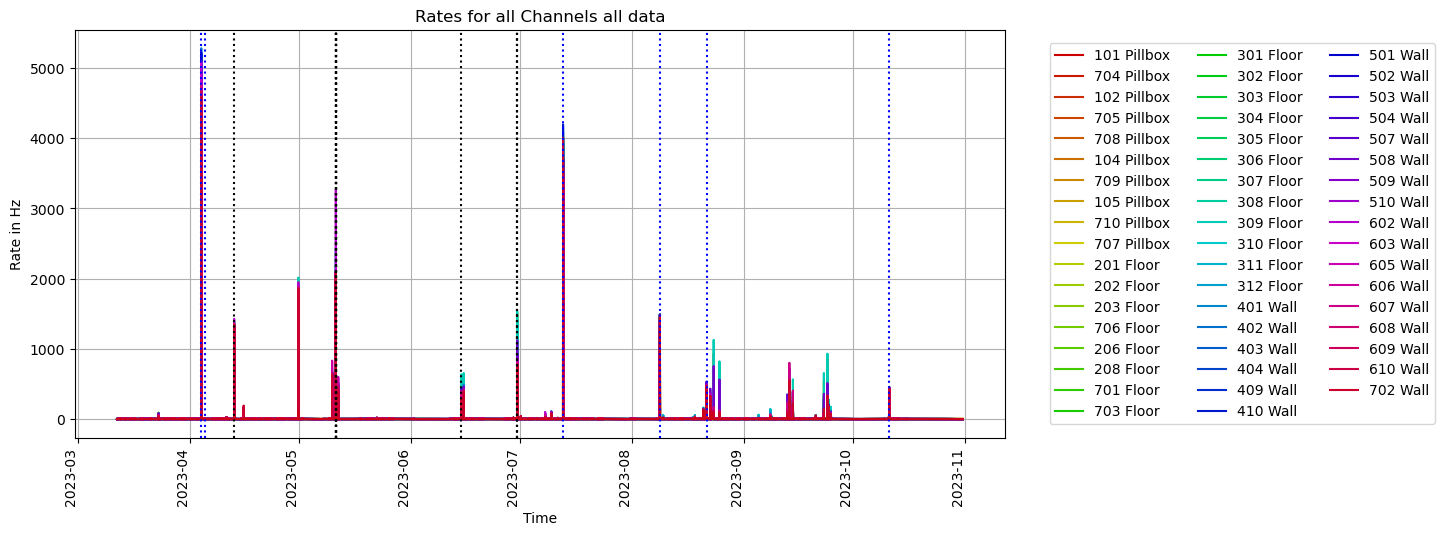

In [26]:
indices = Plotting_Functions.muon_data_1_s_rate_plot(new_dir, PMT_ID, second_range_timestamps, binned_data_array, pulser_events_MV_arr, column_names_pulser_events_MV_arr, \
    wanted_min_amount_non_phys=20, sec_diff=0.001, non_phys='all')

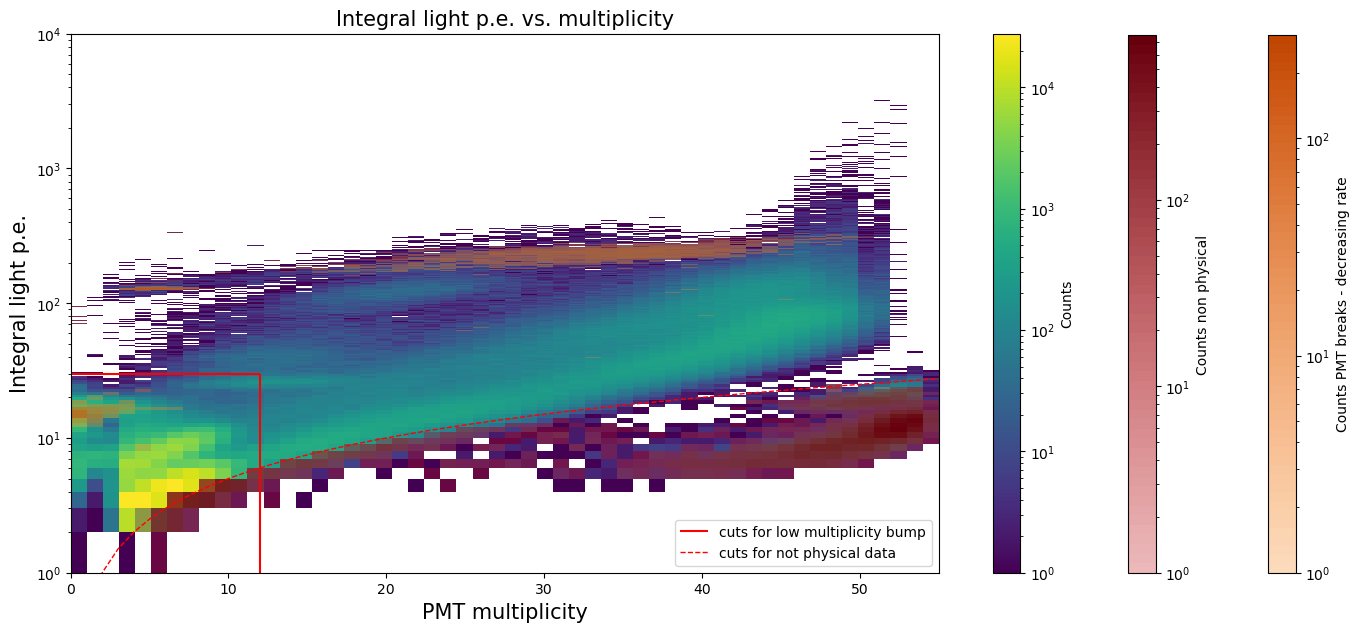

In [6]:
Plotting_Functions.int_light_mult_hist_non_phys_break(new_dir, wanted_arr_column_names, wanted_arr_timestamps)

In [36]:
timestamp_column = indices[:, 0]

# Convert timestamps to string representations of datetime objects
column_datetime_str = [datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S') for ts in timestamp_column]

# Convert the whole indices array to string type, because np.insert does not work with mixed types.
indices_str = indices.astype(str)

# Insert the datetime strings as the first column in 'indices_str'
# Since we're dealing with strings now, there's no need to reshape column_datetime_str before inserting
indices_with_datetime = np.insert(indices_str, 0, column_datetime_str, axis=1)

print(indices_with_datetime.shape)

file_name = "data_with_timestamps_0_45_non_phys_count20_all_second.csv"
#1683785548.626462
# Save the entire 2D array (including timestamps) as a CSV file
np.savetxt(new_dir +file_name, indices_with_datetime, delimiter="\t", fmt='%s', header="timestamp_non_phys\tunix_timestamp\tdiff_next_pulser\tdiff_pulser_before", comments='')

(13, 4)


In [8]:
arr_timestamps = wanted_arr_timestamps

selected_columns = arr_timestamps[:, :10].astype(str)

#print(selected_columns[2894243, :])
# Define the file name for the CSV
file_name_ = "arr_timestamps_to9.csv"

# Save the selected columns to a CSV file
np.savetxt('/global/homes/g/ginagrue/analysis/period_ranges/p03_to_p08/' + file_name_, selected_columns, delimiter="\t", fmt='%s')

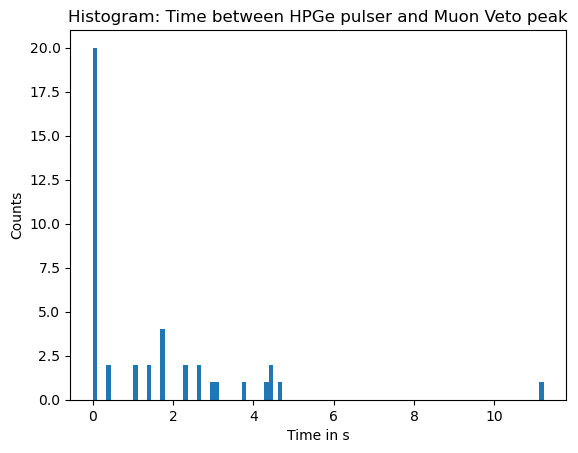

In [9]:
new_column_names_pulser_events_MV_arr = ["timestamp", "non_phys", "diff_next_pulser", "diff_pulser_before"]
new_diff_next_pulser_index = new_column_names_pulser_events_MV_arr.index("diff_next_pulser")
plt.hist(pulser_events_MV_arr[:,new_diff_next_pulser_index], bins=100)
plt.title('Histogram: Time between HPGe pulser and Muon Veto peak')
plt.xlabel('Time in s')
plt.ylabel('Counts')
plt.savefig(new_dir + f'0_10_histo_all_second_time_diff_pulser_MV_0_45_non_phys_count{count_min}.png', dpi=300)
plt.show()
plt.close()

<KeysViewHDF5 ['ch1027200', 'ch1027201', 'ch1027202', 'ch1027203', 'ch1052802', 'ch1052803', 'ch1052804', 'ch1052805', 'ch1054400', 'ch1054401', 'ch1054402', 'ch1054403', 'ch1054404', 'ch1054405', 'ch1056000', 'ch1056001', 'ch1056002', 'ch1056003', 'ch1056004', 'ch1056005', 'ch1057600', 'ch1057601', 'ch1057602', 'ch1057603', 'ch1057604', 'ch1057605', 'ch1059200', 'ch1059201', 'ch1059202', 'ch1059203', 'ch1059204', 'ch1059205', 'ch1060800', 'ch1060801', 'ch1060802', 'ch1060803', 'ch1060804', 'ch1060805', 'ch1062400', 'ch1062401', 'ch1062402', 'ch1062403', 'ch1062404', 'ch1062405', 'ch1064000', 'ch1064001', 'ch1064002', 'ch1064003', 'ch1064004', 'ch1064005', 'ch1065600', 'ch1065601', 'ch1065602', 'ch1065603', 'ch1065604', 'ch1065605', 'ch1067200', 'ch1067201', 'ch1067202', 'ch1067203', 'ch1067204', 'ch1067205', 'ch1078400', 'ch1078401', 'ch1078402', 'ch1078403', 'ch1078404', 'ch1078405', 'ch1080000', 'ch1080001', 'ch1080002', 'ch1080003', 'ch1080004', 'ch1080005', 'ch1081600', 'ch1081601

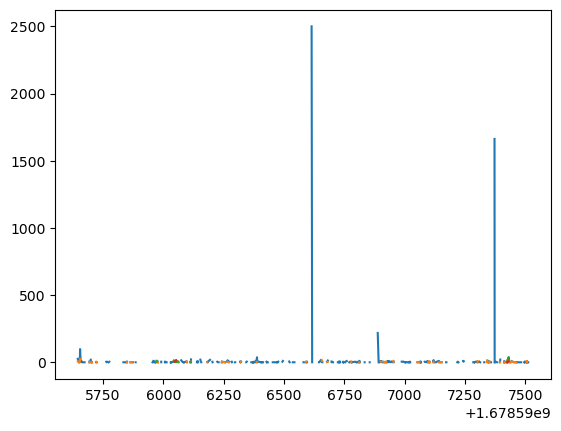

In [16]:
# timestamps_HPGe_LAr = np.array([])
# timestamps_HPGe_pulser = []

HPGe_LAr_phy = h5py.File(filepaths_HPGe_LAr[0],'r')
LAr_timestamp = HPGe_LAr_phy['ch1052804']['dsp']['timestamp'][:]
LAr_energies =  HPGe_LAr_phy['ch1052804']['dsp']['energies'][:]

plt.plot(LAr_timestamp, LAr_energies)

print(HPGe_LAr_phy.keys())

# count = 0
# for counts, f in tqdm(enumerate(filepaths_HPGe_LAr)):
#     try:
#         HPGe_LAr_phy = h5py.File(f"{f}",'r') #reads all of the run files
#     except:
#         pass


In [9]:
#print(1691516013)
unix_timestamp = 1680575296#1680575302 #1691516013  # This represents 2021-01-01 00:00:00

# Convert it to a datetime object
dt_object = datetime.fromtimestamp(unix_timestamp)

# Print the datetime object
print(dt_object)
PMT_breaks_dates_list_datetime = [datetime(2023, 4, 3, 19, 28, 00)]
PMT_break_dates_list = [dt.timestamp() for dt in PMT_breaks_dates_list_datetime]
print(PMT_break_dates_list)

2023-04-03 19:28:16
[1680575280.0]


/tmp/ipykernel_2082664/2481997087.py:4: DtypeWarning: Columns (3,4,5,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_timestamps = pd.read_csv(new_dir + "/df_timestamps_04_non_phy.csv", sep='\t', index_col=0)
/tmp/ipykernel_2082664/2481997087.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muon_data_without_non_phys['total_mult_MV'] = pd.to_numeric(muon_data_without_non_phys['total_mult_MV'], errors='coerce', downcast='float')
/tmp/ipykernel_2082664/2481997087.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

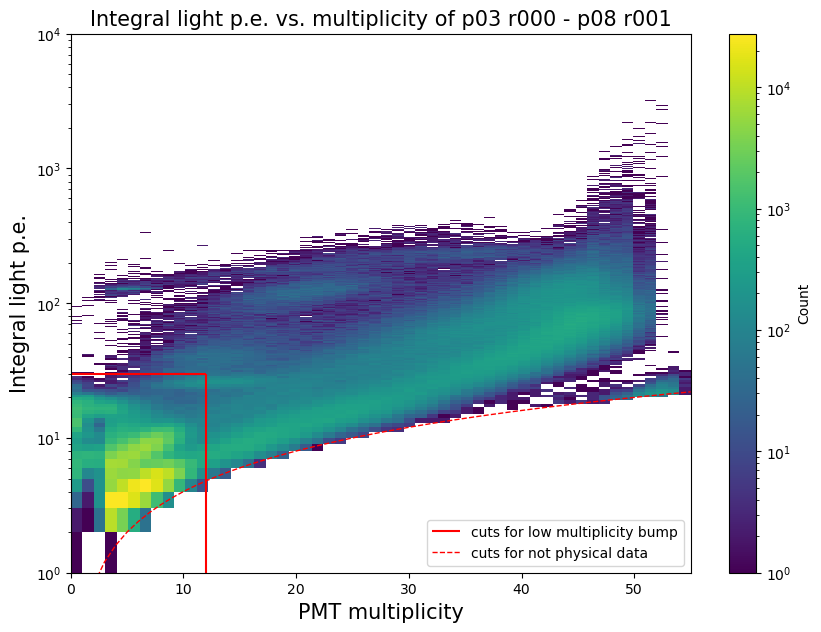

In [37]:
all_muon_data = df_timestamps[(df_timestamps['is_MV'] == True)]

muon_data_without_non_phys = all_muon_data[(all_muon_data['non_phys_MV'] == False)]
muon_data_with_non_phys = all_muon_data[(all_muon_data['Condition_non_phys_Fulfilled'] == True)]
muon_data_without_non_phys['total_mult_MV'] = pd.to_numeric(muon_data_without_non_phys['total_mult_MV'], errors='coerce', downcast='float')
muon_data_without_non_phys['integral_light_MV'] = pd.to_numeric(muon_data_without_non_phys['integral_light_MV'], errors='coerce', downcast='float')

#Plotting_Functions.int_light_vs_mult_plot(all_muon_data['total_mult_MV'], all_muon_data['integral_light_MV'], period, run, new_dir, first_period, last_period, first_run, last_run)
Plotting_Functions.int_light_vs_mult_plot(muon_data_without_non_phys['total_mult_MV'], muon_data_without_non_phys['integral_light_MV'], period, run, new_dir, first_period, last_period, first_run, last_run)
#Plotting_Functions.int_light_vs_mult_plot(muon_data_with_non_phys['total_mult_MV'], muon_data_with_non_phys['integral_light_MV'], period, run, new_dir, first_period, last_period, first_run, last_run)

In [34]:
type((df_timestamps['is_MV'])[0])

numpy.bool_

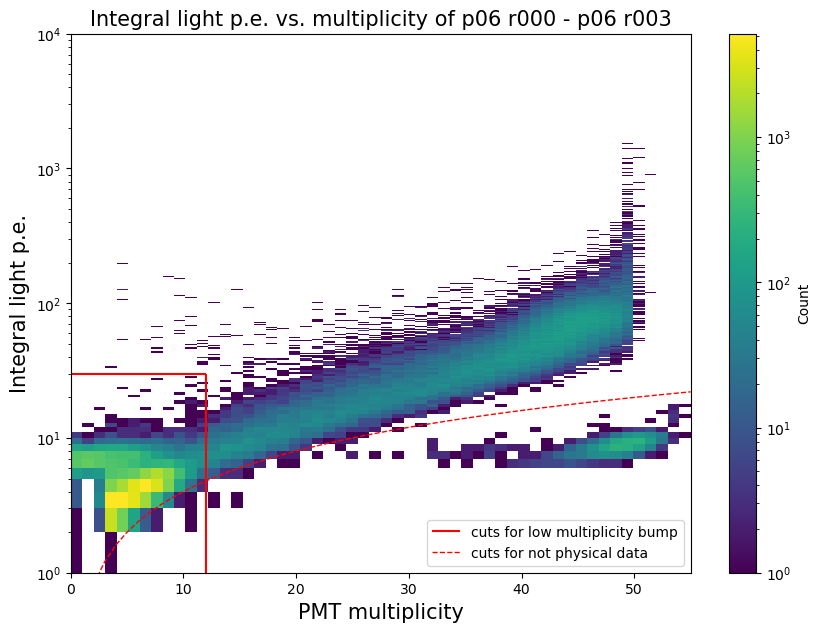

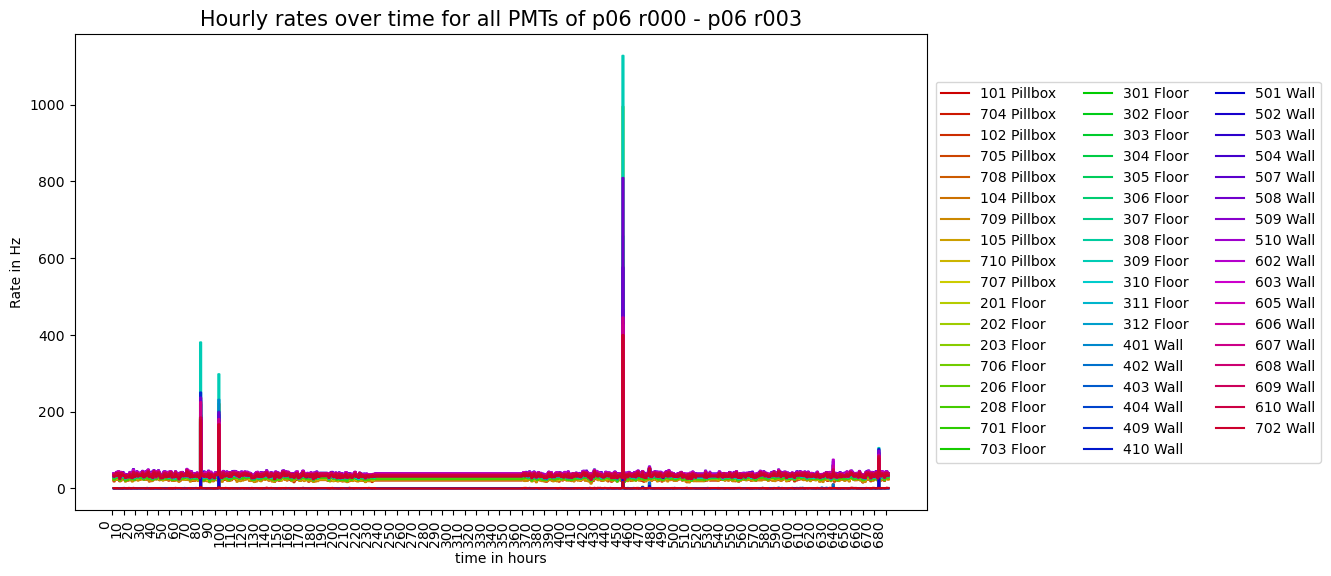

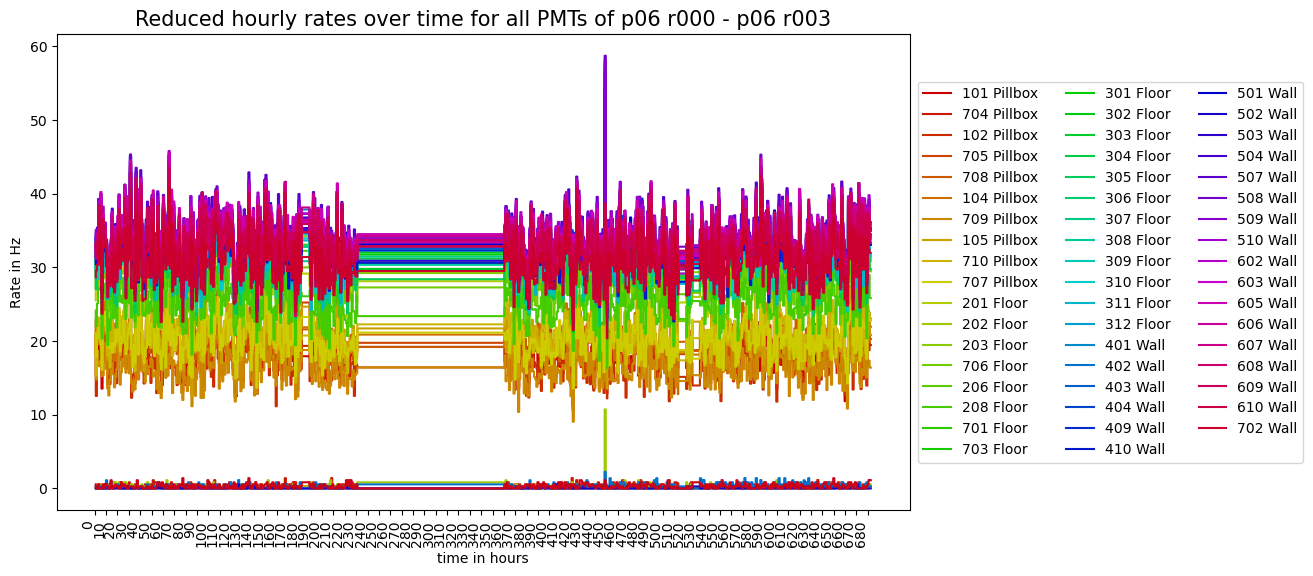

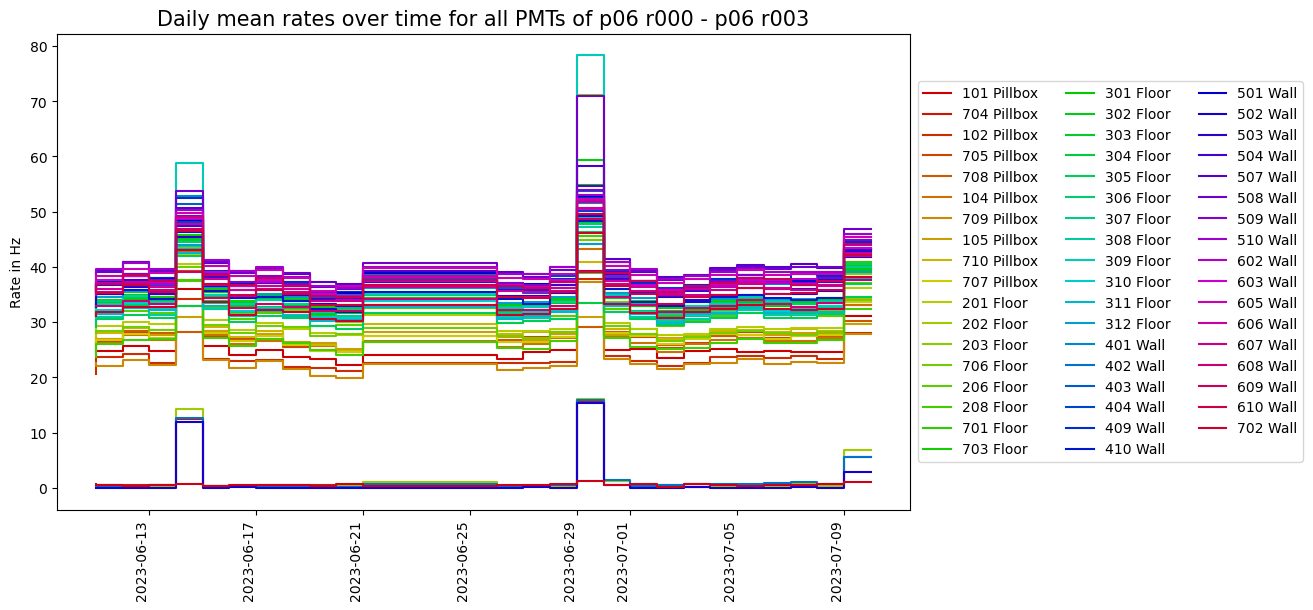

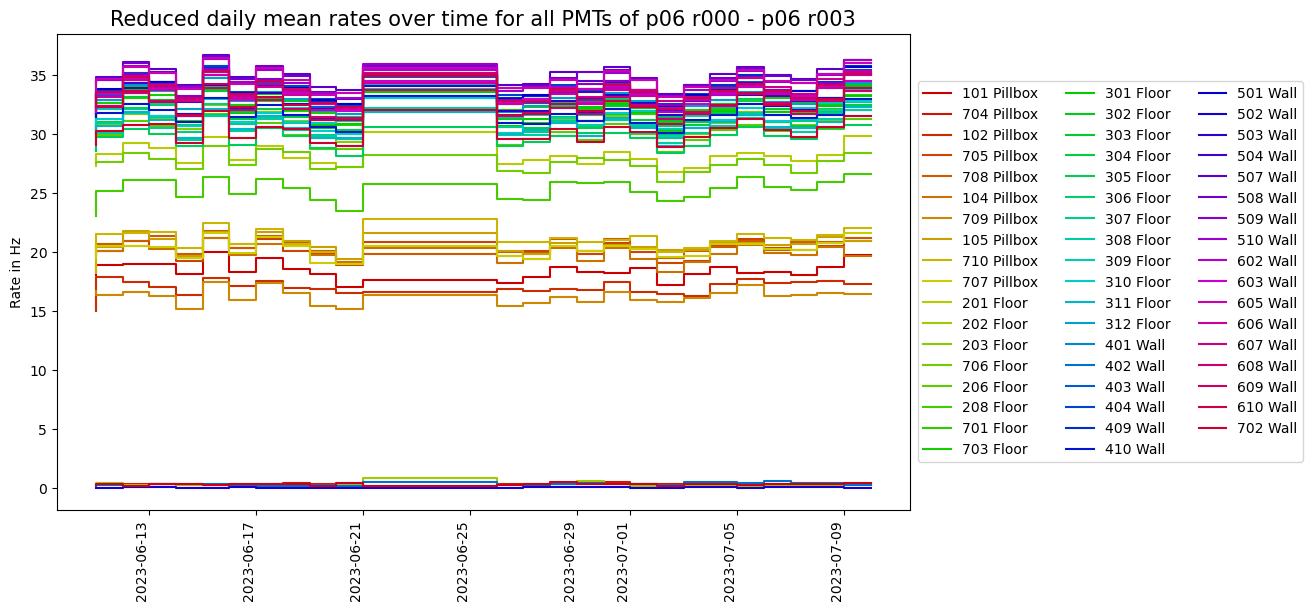

In [17]:
# Plotting of the Analysis plots
#Plotting_Functions.int_light_hist_plot(integral_light, new_dir, first_period, last_period, first_run, last_run)
#Plotting_Functions.mult_hist_plot(total_mult, run, period, new_dir, first_period, last_period, first_run, last_run)
Plotting_Functions.int_light_vs_mult_plot(total_mult, integral_light, period, run, new_dir, first_period, last_period, first_run, last_run)
#Plotting_Functions.red_int_light_vs_mult_plot(red_muon_mult, red_integral_light, period, run, new_dir, first_period, last_period, first_run, last_run)
#Plotting_Functions.int_light_mult_undershoot_plot(total_mult, integral_light, integral_light_peak_valley, new_dir, first_period, last_period, first_run, last_run)
Plotting_Functions.hourly_rates_plot(time_list, complete_duration, rates_arr, period, run, PMT_ID, new_dir, first_period, last_period, first_run, last_run)
Plotting_Functions.red_hourly_rates_plot(complete_duration, rates_red_arr, period, run, PMT_ID, new_dir, first_period, last_period, first_run, last_run)
Plotting_Functions.daily_rates_plot(time_list, rates_arr, period, run, PMT_ID, new_dir, first_period, last_period, first_run, last_run)
Plotting_Functions.red_daily_rates_plot(time_list, rates_red_arr, period, run, PMT_ID, new_dir, first_period, last_period, first_run, last_run)
#Plotting_Functions.PMT_breaks_plot(percent_df, first_period, last_period, first_run, last_run)
#Plotting_Functions.event_number_plot(event_number, pulse_heights, period, run, new_dir, first_period, last_period, first_run, last_run)

In [15]:
file= "/global/cfs/projectdirs/legend/data/lngs/l200/public/prodenv/prod-blind/tmp/auto/generated/tier/dsp/phy/p03/r000/l200-p03-r000-phy-20230312T055349Z-tier_dsp.lh5"

f_phy_test = h5py.File(file,'r')

#print(f_phy_test.keys())

df_pulser_timestamp = f_phy_test['ch1027201']['dsp'].keys()
print(df_pulser_timestamp)

# dataset=f_phy_test['dsp_info']['python_version']
# print(dataset[()])

geds = ldm.Subsystem('geds', experiment='l200', period='p03', runs=1,  type='phy', version='', path='/global/cfs/projectdirs/legend/data/lngs/l200/public/prodenv/prod-blind/tmp/auto/')
spms = ldm.Subsystem('spms', experiment='l200', period='p04', runs=1, type='phy', version='', path='/global/cfs/projectdirs/legend/data/lngs/l200/public/prodenv/prod-blind/tmp/auto/')
pulser = ldm.Subsystem('pulser', experiment='L200', period='p04', runs=[1,2], type='phy', version='', path='/global/cfs/projectdirs/legend/data/lngs/l200/public/prodenv/prod-blind/tmp/auto/')
df_geds = geds.channel_map
df_spms = spms.channel_map
df_pulser = pulser.channel_map


# df_geds.to_csv(new_dir + "/channels_HPGe.csv", sep=',', index=False)
# df_spms.to_csv(new_dir + "/channels_LAr.csv", sep=',', index=False)
# #pulser.get_data()
# #pulser.data
# pd.set_option('display.max_rows', None)    # Show all rows
# pd.set_option('display.max_columns', None) 
# geds.channel_map
# #spms.channel_map
#print(df_pulser)

2023-10-27 06:08:48,755:  ---------------------------------------------
2023-10-27 06:08:48,756:  --- S E T T I N G  UP : geds
2023-10-27 06:08:48,757:  ---------------------------------------------
2023-10-27 06:08:48,769:  ... getting channel map


<KeysViewHDF5 ['A_max', 'QDrift', 'baseline', 'bl_intercept', 'bl_mean', 'bl_slope', 'bl_std', 'cuspEftp', 'cuspEmax', 'dt_eff', 'dt_eff_invert', 'lq80', 'pz_mean', 'pz_slope', 'pz_std', 't_discharge', 't_sat_hi', 't_sat_lo', 'timestamp', 'tp_01', 'tp_0_atrap', 'tp_0_est', 'tp_0_invert', 'tp_10', 'tp_100', 'tp_100_invert', 'tp_10_invert', 'tp_20', 'tp_20_invert', 'tp_50', 'tp_50_invert', 'tp_80', 'tp_80_invert', 'tp_90', 'tp_90_invert', 'tp_95', 'tp_99', 'tp_99_invert', 'tp_aoe_max', 'tp_max', 'tp_min', 'trapEftp', 'trapEmax', 'trapSmax', 'trapTftp_invert', 'trapTmax', 'trapTmax_invert', 'wf_max', 'wf_min', 'zacEftp', 'zacEmax']>


2023-10-27 06:08:49,768:  ... getting channel status
2023-10-27 06:08:50,347:  ---------------------------------------------
2023-10-27 06:08:50,348:  --- S E T T I N G  UP : spms
2023-10-27 06:08:50,348:  ---------------------------------------------
2023-10-27 06:08:50,361:  ... getting channel map
2023-10-27 06:08:50,958:  ... getting channel status
2023-10-27 06:08:51,630:  ---------------------------------------------
2023-10-27 06:08:51,631:  --- S E T T I N G  UP : pulser
2023-10-27 06:08:51,631:  ---------------------------------------------
2023-10-27 06:08:51,641:  ... getting channel map
2023-10-27 06:08:52,281:  ... getting channel status


In [13]:
pulser.get_data()
pulser.data

2023-10-27 06:01:31,026:  ... getting data
2023-10-27 06:01:31,028:  ...... setting up DataLoader
2023-10-27 06:01:31,030:  ...... loading parameters from the following tiers:
2023-10-27 06:01:31,030:         param tier
0   baseline  dsp
1     wf_max  dsp
2  timestamp  dsp
2023-10-27 06:01:31,033:  ...... not loading channels with status off: []
2023-10-27 06:01:31,585:  ...... querying DataLoader (includes quickfix-removed faulty files)
2023-10-27 06:01:31,585:  (run == 'r001') or (run == 'r002') and (type == 'phy') and (timestamp != '20230125T222013Z') and (timestamp != '20230126T015308Z') and (timestamp != '20230222T231553Z')


Building entry list:   0%|          | 1/420 [00:00<00:03, 117.97keys/s, key=20230421T131817Z]

Loading data: 100%|##########| 1/1 [00:00<00:00,  2.83it/s, table=1027201, tier=dsp]

2023-10-27 06:02:18,389:  Total time to load data: 0:00:46.798023
2023-10-27 06:02:18,408:  ... mapping to name and string/fiber position
2023-10-27 06:02:18,611:  ... flagging pulser events


,datetime,channel,baseline,timestamp,wf_max,name,location,position,cc4_id,cc4_channel,daq_crate,daq_card,HV_card,HV_channel,det_type,status,flag_pulser
0,2023-04-21 13:18:24.000017152+00:00,1027201,14982,1.682083e+09,55210.996094,PULS01,0,0,None,None,1,0,None,None,None,on,True
1,2023-04-21 13:18:26.000017152+00:00,1027201,14985,1.682083e+09,55214.500000,PULS01,0,0,None,None,1,0,None,None,None,on,True
2,2023-04-21 13:18:28.000017152+00:00,1027201,14986,1.682083e+09,55207.167969,PULS01,0,0,None,None,1,0,None,None,None,on,True
3,2023-04-21 13:18:30.000017152+00:00,1027201,14984,1.682083e+09,55211.835938,PULS01,0,0,None,None,1,0,None,None,None,on,True
4,2023-04-21 13:18:32.000017152+00:00,1027201,14983,1.682083e+09,55248.003906,PULS01,0,0,None,None,1,0,None,None,None,on,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832473,2023-05-01 15:00:26.083840512+00:00,1027201,14977,1.682953e+09,14984.500000,PULS01,0,0,None,None,1,0,None,None,None,on,False
832474,2023-05-01 15:00:26.673200128+00:00,1027201,14977,1.682953e+09,14983.000000,PULS01,0,0,None,None,1,0,None,None,None,on,False
832475,2023-05-01 15:00:28.421748480+00:00,1027201,14978,1.682953e+09,14984.332031,PULS01,0,0,None,None,1,0,None,None,None,on,False
832476,2023-05-01 15:00:33.984809472+00:00,1027201,14974,1.682953e+09,14982.000977,PULS01,0,0,None,None,1,0,None,None,None,on,False


In [ ]:
arr_column_names=wanted_arr_column_names
arr_timestamps = wanted_arr_timestamps

is_MV_index = arr_column_names.index("is_MV")
total_mult_MV_index = arr_column_names.index("total_mult_MV")
integral_light_MV_index = arr_column_names.index("integral_light_MV")
is_MV_mask = (arr_timestamps[:, is_MV_index] == True)
arr_timestamps_MV = arr_timestamps[is_MV_mask]
MV_total_mult = arr_timestamps_MV[:, total_mult_MV_index]
MV_int_light = arr_timestamps_MV[:, integral_light_MV_index]

Condition_non_phys_Fulfilled_index_index = arr_column_names.index("Condition_non_phys_Fulfilled")
is_condition_fulfilled_mask = (arr_timestamps_MV[:, Condition_non_phys_Fulfilled_index_index] == True)
arr_timestamps_MV_cond_fulfilled = arr_timestamps_MV[is_condition_fulfilled_mask]
MV_total_mult_cond_fulfilled = arr_timestamps_MV_cond_fulfilled[:, total_mult_MV_index]
MV_int_light_cond_fulfilled = arr_timestamps_MV_cond_fulfilled[:, integral_light_MV_index]

PMT_break_date_index_index = arr_column_names.index("PMT_break_date")
is_PMT_break_date_mask = (arr_timestamps[:, PMT_break_date_index_index] == True)
arr_timestamps_MV_PMT_break = arr_timestamps[is_PMT_break_date_mask]
MV_total_mult_PMT_break = arr_timestamps_MV_PMT_break[:, total_mult_MV_index]
MV_int_light_PMT_break = arr_timestamps_MV_PMT_break[:, integral_light_MV_index]

bool_array = arr_timestamps[:, 9].astype(bool)

# Check the values and their types
print(bool_array)
print(np.sum(bool_array))  # This should still give you the number of True values
print(bool_array.dtype)

# Try to use the boolean array as a mask
arr_timestamps_MV_PMT_break = arr_timestamps[bool_array]
print(arr_timestamps_MV_PMT_break.shape)

fig = plt.figure(figsize=(14,7))
# Original Reds colormap
red = plt.get_cmap("Reds")
# Number of colors in the colormap
n_colors = red.N

start_color = 200  # Adjust this value to match your desired start color
end_color = n_colors  # Adjust this value to match your desired end color

# Extract the "redest" colors
redest_colors = red(np.arange(start_color, end_color))

# Modify the alpha values for the redest_colors
alpha_values = np.linspace(0.3, 1, len(redest_colors))
#alpha_values[0] = 0  # Set the first alpha value to 0

# Create a modified colormap for the "redest" colors
modified_redest_colors = redest_colors.copy()
modified_redest_colors[:, -1] = alpha_values
modified_redest_cmap = mcolors.ListedColormap(modified_redest_colors)


################################# green ##################################
green = plt.get_cmap("YlOrBr")
# Number of colors in the colormap
n_colors = green.N

start_color = 140  # Adjust this value to match your desired start color
end_color = 200  # Adjust this value to match your desired end color

# Extract the "redest" colors
greenest_colors = green(np.arange(start_color, end_color))

# Modify the alpha values for the redest_colors
alpha_values = np.linspace(0.3, 1, len(greenest_colors))
#alpha_values[0] = 0  # Set the first alpha value to 0

# Create a modified colormap for the "redest" colors
modified_greenest_colors = greenest_colors.copy()
modified_greenest_colors[:, -1] = alpha_values
modified_greenest_cmap = mcolors.ListedColormap(modified_greenest_colors)

#################################################################################

# Create a 2D histogram and use a logarithmic color scale
light_vs_mult = plt.hist2d(MV_total_mult, MV_int_light, bins=(54, 10000), range=((0,55),(1, 10000)), norm=mpl.colors.LogNorm())
light_vs_mult_PMT_break = plt.hist2d(MV_total_mult_PMT_break, MV_int_light_PMT_break, bins=(54, 10000), range=((0,55),(1, 10000)), cmap=modified_greenest_cmap,  norm=mpl.colors.LogNorm())
light_vs_mult_non_phys = plt.hist2d(MV_total_mult_cond_fulfilled, MV_int_light_cond_fulfilled, bins=(54, 10000), range=((0,55),(1, 10000)), cmap=modified_redest_cmap,  norm=mpl.colors.LogNorm())


# Customize the plot
plt.yscale("log")
plt.xlabel("PMT multiplicity", size=15)
plt.ylabel("Integral light p.e.", size=15)
plt.title("Integral light p.e. vs. multiplicity", size=15)

plt.hlines(30, 0, 12, "red", label='cuts for low multiplicity bump')
x_values = range(56)
y_values = [0.5 * x for x in x_values]
plt.plot(x_values, y_values, color='red', linestyle='--', linewidth=1, label='cuts for not physical data')
plt.vlines(12, 1, 30, "red")
plt.legend(loc='lower right')

cbar1 = plt.colorbar(light_vs_mult[3], label='data', norm=mpl.colors.LogNorm())
cbar1.set_label('Counts')
#Create a divider for the existing axes instance
cax2 = fig.add_axes([0.88, 0.11, 0.02, 0.768]) 
cbar2 = plt.colorbar(light_vs_mult_non_phys[3], label='non physical', cax=cax2)
cbar2.set_label('Counts non physical')

cax3 = fig.add_axes([0.98, 0.11, 0.02, 0.768]) 
cbar3 = plt.colorbar(light_vs_mult_PMT_break[3], label='PMT break', cax=cax3)
cbar3.set_label('Counts PMT breaks - random off')

# Show the plot
plt.savefig(new_dir + '2Dhisto_int_light_mult_1_0_second_0_45_non_phys_count20_random_off.png', dpi=300)
plt.show()

plt.close()